In [64]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

# Define Signals

## Signal 1 and Signal 2

Energy signal 1 = 8192.0
Energy signal 2 = 8192.0
Power signal 1 = 1.0
Power signal 2 = 1.0


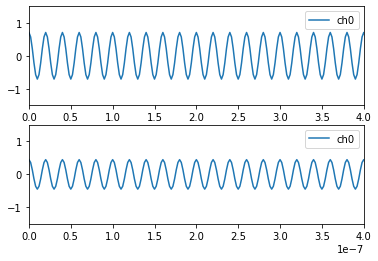

In [87]:
# sample period 
dt = 2e-9 # 2ns <-> 500 MHz

# number of channels for signal 1
N_ch1 = 2
N_ch2 = 5

# number of samples
num_samp = 8192

# time
time = np.arange(0, num_samp, 1) * dt

# signal power
power = 1

# noise_variance
noise_variance = 1e2

## signal 1

# amplitude signal 1
amp1 = np.sqrt(power / N_ch1)

# frequency signal 1
#freq1 = 66.8945e6 # uncomment to use frequency exactly on a DFFT frequency.
freq1 = 50e6

s1 = []
for n in range(N_ch1):
    s1.append(amp1 * np.exp(-1j * 2 * np.pi * freq1 * time))
s1 = np.asarray(s1)

## signal 2

# amplitude signal 2
amp2 = np.sqrt(power / N_ch2)

# frequency signal 2
freq2 = freq1

s2 = []
for n in range(N_ch2):
    s2.append(amp2 * np.exp(-1j * 2 * np.pi * freq2 * time))
s2 = np.asarray(s2)

E1 = np.matmul(s1, s1.conjugate().T).trace().real
E2 = np.matmul(s1, s1.conjugate().T).trace().real
print('Energy signal 1 = %.1f' % E1)
print('Energy signal 2 = %.1f' % E2)

print('Power signal 1 = %.1f' % (E1 / num_samp))
print('Power signal 2 = %.1f' % (E2 / num_samp))

fig = plt.figure()

ax1 = plt.subplot(2, 1, 1)
ax1.plot(time, np.real(s1[0]), label = 'ch0')
ax1.set_xlim(time[0], time[200])
ax1.set_ylim(-1.5, 1.5)
ax1.legend(loc=1)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(time, np.real(s2[0]), label = 'ch0')
ax2.set_xlim(time[0], time[200])
ax2.set_ylim(-1.5, 1.5)
ax2.legend(loc=1)

## noisy signal 1 and signal 2

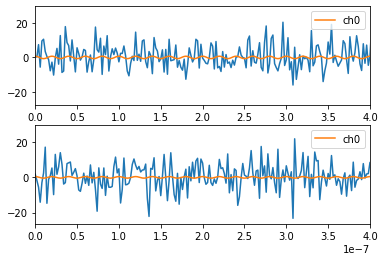

In [88]:
# signal 1
x1 = []
for n in range(N_ch1):
    noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, int(np.ceil(num_samp)))
    noise = noise[:, 0] + 1j * noise[:, 1]
    x1.append(s1[n] + noise)
x1 = np.asarray(x1)

# signal 2
x2 = []
for n in range(N_ch2):
    noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, int(np.ceil(num_samp)))
    noise = noise[:, 0] + 1j * noise[:, 1]
    x2.append(s2[n] + noise)
x2 = np.asarray(x2)

fig = plt.figure()

ax1 = plt.subplot(2, 1, 1)
ax1.plot(time, np.real(x1[0]))
ax1.plot(time, np.real(s1[0]), label = 'ch0')
ax1.set_xlim(time[0], time[200])
#ax1.set_ylim(-1.5, 1.5)
ax1.legend(loc=1)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(time, np.real(x2[0]))
ax2.plot(time, np.real(s2[0]), label = 'ch0')
ax2.set_xlim(time[0], time[200])
#ax2.set_ylim(-1.5, 1.5)
ax2.legend(loc=1)

# Baseline - DAS

Energy signal 1 = 8192.0
Energy signal 2 = 8192.0
Power signal 1 = 1.0
Power signal 2 = 1.0
Mean SNR for signal 1 = 79.12
Mean SNR for signal 2 = 80.01


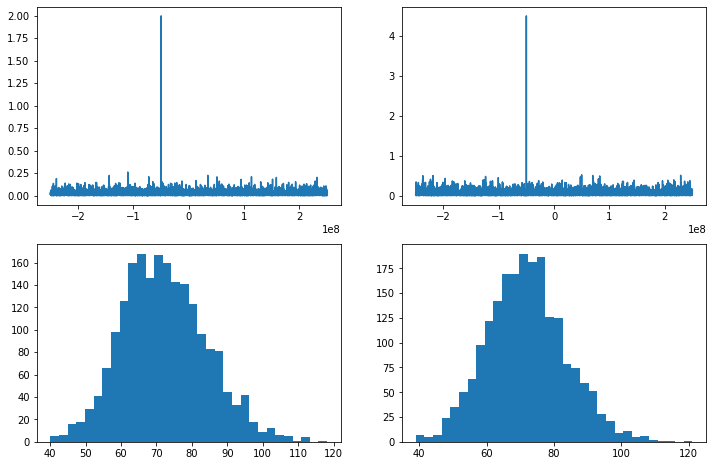

In [89]:
# sum signals
f1 = np.argmax(abs(np.fft.fftshift(np.fft.fft(s1.sum(0)))))
f2 = np.argmax(abs(np.fft.fftshift(np.fft.fft(s2.sum(0)))))

y1 = x1.sum(0)
y2 = x2.sum(0)

# transform
fft1 = np.fft.fftshift(np.fft.fft(y1)) / num_samp
fft2 = np.fft.fftshift(np.fft.fft(y2)) / num_samp

freq = np.fft.fftshift(np.fft.fftfreq(int(np.ceil(num_samp)), dt))

fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(freq, abs(fft1)**2)
#ax1.set_ylim(0, 1.5)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(freq, abs(fft2)**2)
#ax2.set_ylim(0, 1.5)

# get stats
N = 2048

snr_list1 = []
snr_list2 = []
for n in range(N):
    x1 = []
    for n in range(N_ch1):
        noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, int(np.ceil(num_samp)))
        noise = noise[:, 0] + 1j * noise[:, 1]
        x1.append(s1[n] + noise)
    x1 = np.asarray(x1)

    x2 = []
    for n in range(N_ch2):
        noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, int(np.ceil(num_samp)))
        noise = noise[:, 0] + 1j * noise[:, 1]
        x2.append(s2[n] + noise)
    x2 = np.asarray(x2)
    
    y1 = x1.sum(0)
    y2 = x2.sum(0)
    
    fft1 = np.fft.fftshift(np.fft.fft(y1)) / num_samp
    fft2 = np.fft.fftshift(np.fft.fft(y2)) / num_samp
    
    snr_list1.append(abs(fft1[f1])**2 / np.mean(abs(fft1)**2))
    snr_list2.append(abs(fft2[f2])**2 / np.mean(abs(fft2)**2))

#print(np.max(abs(fft1)**2), np.max(abs(fft2))**2)
print('Energy signal 1 = %.1f' % E1)
print('Energy signal 2 = %.1f' % E2)

print('Power signal 1 = %.1f' % (E1 / num_samp))
print('Power signal 2 = %.1f' % (E2 / num_samp))

ax3 = plt.subplot(2, 2, 3)
hist1 = ax3.hist(snr_list1, 32)
#ax3.set_ylim(0, 1.5)

ax4 = plt.subplot(2, 2, 4)
hist2 = ax4.hist(snr_list2, 32)

print('Mean SNR for signal 1 = %.2f' % np.mean(hist1[1]))
print('Mean SNR for signal 2 = %.2f' % np.mean(hist2[1]))

# Matched Filter Approach

Power signal 1 = 0.5
Power signal 2 = 0.2
Mean MF score for signal 1 = 9.04
Mean SNR for signal 2 = 9.35


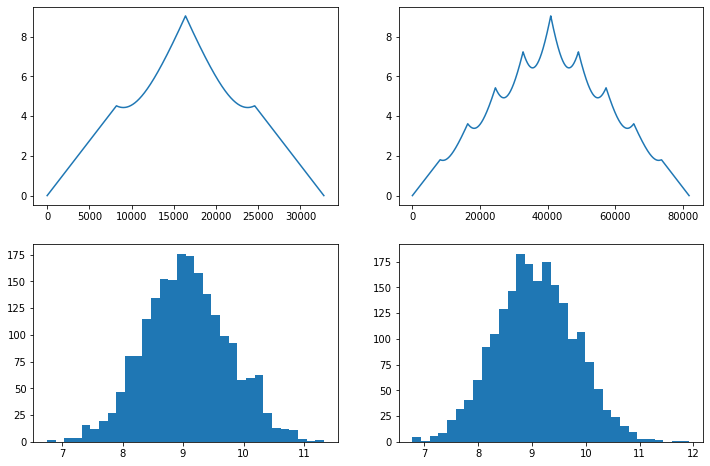

In [92]:
# flatten signals
s1_flat = s1.reshape(s1.size)
s2_flat = s2.reshape(s2.size)

x1_flat = s1.reshape(x1.size)
x2_flat = s2.reshape(x2.size)

# templates
h1 = s1_flat / (np.sqrt(np.vdot(s1_flat, s1_flat).real * noise_variance))
h2 = s2_flat / (np.sqrt(np.vdot(s2_flat, s2_flat).real * noise_variance))

# convolve
conv1 = scipy.signal.fftconvolve(h1, x1_flat)
conv2 = scipy.signal.fftconvolve(h2, x2_flat)

fig = plt.figure(figsize=(12,8))

ax1 = plt.subplot(2, 2, 1)
ax1.plot(abs(conv1))
#ax1.set_xlim(num_samp1 * 0.9, num_samp1 * 1.1)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(abs(conv2))
#ax2.set_ylim(0, 1.5)

# get stats
N = 2048

mf_score_list1 = []
mf_score_list2 = []
for n in range(N):
    noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, num_samp * N_ch1)
    noise = noise[:, 0] + 1j * noise[:, 1]

    x1_flat = s1_flat + noise

    noise = np.random.multivariate_normal([0, 0], np.eye(2) * noise_variance / 2, num_samp * N_ch2)
    noise = noise[:, 0] + 1j * noise[:, 1]

    x2_flat = s2_flat + noise
    
    mf_score_list1.append(np.vdot(h1, x1_flat))
    mf_score_list2.append(np.vdot(h2, x2_flat))

#print(np.max(abs(fft1)**2), np.max(abs(fft2))**2)
print('Power signal 1 = %.1f' % (np.vdot(s1_flat, s1_flat).real / (num_samp * N_ch1)))
print('Power signal 2 = %.1f' % (np.vdot(s2_flat, s2_flat).real / (num_samp * N_ch2)))


ax3 = plt.subplot(2, 2, 3)
hist1 = ax3.hist(abs(np.asarray(mf_score_list1)), 32)
#ax3.set_ylim(0, 1.5)

ax4 = plt.subplot(2, 2, 4)
hist2 = ax4.hist(abs(np.asarray(mf_score_list2)), 32)

print('Mean MF score for signal 1 = %.2f' % np.mean(hist1[1]))
print('Mean SNR for signal 2 = %.2f' % np.mean(hist2[1]))
print('For equal total recieved energy the array channel number does not affect matched filter score.')